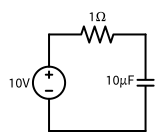

In [60]:
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    d += elm.SourceV().up().label('10V')
    d += elm.Resistor().right().label('1Ω')
    d += elm.Capacitor().down().label('10μF')
    d += elm.Line().left()

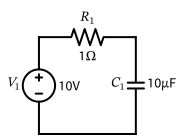

In [61]:
with schemdraw.Drawing() as d:
    d += elm.SourceV(d="up", toplabel="$V_1$", botlabel="10V")
    d += elm.Resistor(d="right", toplabel="$R_1$", botlabel="1Ω")
    d += elm.Capacitor(d="down", toplabel="$C_1$" , botlabel="10μF")
    d += elm.Line(d="left")

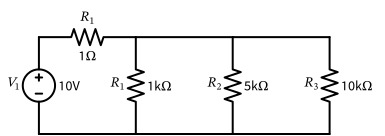

In [62]:
with schemdraw.Drawing() as d:
    d += (battery := elm.SourceV(d="up", toplabel="$V_1$", botlabel="10V"))
    d += elm.Resistor(d="right", toplabel="$R_1$", botlabel="1Ω")
    d.push()
    d += elm.Resistor(d="down", toplabel="$R_1$", botlabel="1kΩ")
    d.pop()
    d += elm.Line(d="right")
    d.push()
    d += elm.Resistor(d="down", toplabel="$R_2$", botlabel="5kΩ")
    d.pop()
    d += elm.Line(d="right")
    d += elm.Resistor(d="down", toplabel="$R_3$", botlabel="10kΩ")
    d += elm.Line(d='left', tox=battery.start)


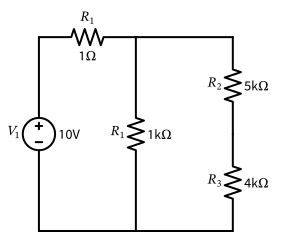

In [63]:
with schemdraw.Drawing() as d:
    d += (battery := elm.SourceV(d="up", toplabel="$V_1$", botlabel="10V").length(6))
    d += elm.Resistor(d="right", toplabel="$R_1$", botlabel="1Ω")
    d.push()
    d += elm.Resistor(d="down", toplabel="$R_1$", botlabel="1kΩ").length(6)
    d.pop()
    d += elm.Line(d="right")
    d.push()
    d += elm.Resistor(d="down", toplabel="$R_2$", botlabel="5kΩ").length(3)
    d += elm.Resistor(d="down", toplabel="$R_3$", botlabel="4kΩ").length(3)
    d += elm.Line(d='left', tox=battery.start)

In [64]:
with schemdraw.Drawing(show=False, backend="svg", file="out.svg") as d:
    d.config(inches_per_unit=1, fontsize=68.0, lw=4)
    d += (battery := elm.SourceV(d="up", toplabel="$V_1$", botlabel="10V").length(20))
    d += elm.Resistor(d="right", toplabel="$R_1$", botlabel="1Ω").length(5.55)

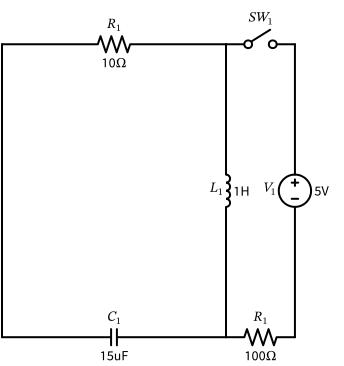

In [65]:
with schemdraw.Drawing() as d:
    d.config(fontsize=14.0, lw=2)
    scale_factor = 30.0
    def goto(x, y):
        return ((x - 176.0)/scale_factor, (80.0 - y)/scale_factor)
 

    def length_horizontal(x1, x2):
        return abs(x1 - x2)/scale_factor

    def length_vertical(y1, y2):
        return abs(y1 - y2)/scale_factor

    
    d += elm.Resistor(d="right", toplabel="$R_1$", botlabel="10Ω").at(goto(176.0, 80.0)).length(length_horizontal(176.0, 384.0))
    d += elm.Line(d="down").at(goto(176.0, 80.0)).length(length_vertical(80.0, 352.0))
    d += elm.Switch(d="right", toplabel="$SW_1$").at(goto(384.0, 80.0)).length(length_horizontal(384.0, 448.0))
    d += elm.Inductor(d="down", toplabel="$L_1$",  botlabel="1H").at(goto(384.0, 80.0)).length(length_vertical(80.0, 352.0))
    d += elm.SourceV(d="down", toplabel="$V_1$",  botlabel="5V", reverse=True).at(goto(448.0, 80.0)).length(length_vertical(352.0, 80.0))
    d += elm.Resistor(d="right", toplabel="$R_1$", botlabel="100Ω").at(goto(384.0, 352.0)).length(length_horizontal(384.0, 448.0))
    d += elm.Capacitor(d="right", toplabel="$C_1$", botlabel="15uF").at(goto(176.0, 352.0)).length(length_horizontal(176.0, 384.0))


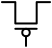

In [66]:
with schemdraw.Drawing() as d:
    d.config(fontsize=14.0, lw=2)
    #d += elm.legacy.NFET4().up()
    d += elm.transistors.PFet().down()
   

In [67]:
from schemdraw.elements import Element2Term
from schemdraw import Segment, SegmentCircle, SegmentArrow

reswidth = 1.0 / 6   # Full (inner) length of resistor is 1.0 data unit
fetw = reswidth*4
feth = reswidth*5
fetl = feth/2
fetgap = reswidth*1.5
fetr = reswidth*.7  # Radius of "not" bubble

class PChannelMOSFET(Element2Term):
    ''' P-type Field Effect Transistor which extends
        source/drain leads to the desired length

        Args:
            bulk: Draw bulk contact

        Anchors:
            * source
            * drain
            * gate
    '''
    def __init__(self, *d, bulk: bool=False, **kwargs):
        super().__init__(*d, **kwargs)
        self.segments.append(Segment([(0, 0), (fetl, 0), (fetl, fetw),
                                      (fetl+fetw, fetw), (fetl+fetw, 0), (2*fetl+fetw, 0)]))
        self.segments.append(Segment([(fetl, fetw+fetgap), (fetl+fetw, fetw+fetgap)]))
        self.segments.append(SegmentCircle((fetl+fetw/2, fetw+fetgap+fetr), fetr))
        self.segments.append(Segment([(fetl+fetw/2, fetw+fetgap+fetr*2), (fetl+fetw/2, fetw+fetgap+fetr+fetl)]))
        self.anchors['isource'] = (2*fetl+fetw, 0)
        self.anchors['idrain'] = (0, 0)
        self.anchors['gate'] = (fetl+fetw/2, fetw+fetgap+fetr+fetl)
        self.params['lblloc'] = 'bottom'
        if bulk:
            self.segments.append(Segment([(fetl+fetw/2, 0), (fetl+fetw/2, fetw)],
                                         arrow='->', arrowwidth=.2))
            self.anchors['bulk'] = (fetl+fetw/2, 0)

    def _place_anchors(self, start, end):
        ''' Allow positioning anchors relative to extended endpoints
            before the element is placed
        '''
        super()._place_anchors(start, end)
        self.anchors['source'] = self.anchors['end']
        self.anchors['drain'] = self.anchors['start']
        if self._userparams.get('reverse', False):
            self.anchors['source'] = self.anchors['start']
            self.anchors['drain'] = self.anchors['end']



In [68]:
from schemdraw.elements import Element2Term

resheight = 0.25

class MohanResistor(Element2Term):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.segments.append(Segment(
            [[0, 0], [0.5*reswidth, resheight], [1.5*reswidth, -resheight],
             [2.5*reswidth, resheight], [3.5*reswidth, -resheight],
             [4.5*reswidth, resheight], [5.5*reswidth, -resheight], [6*reswidth, 0]]))

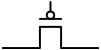

In [78]:
with schemdraw.Drawing() as d:
    d.config(fontsize=14.0, lw=2)
    #d += elm.legacy.NFET4().up()
    #d += MohanResistor()
    d += PChannelMOSFET().left()
    #d += PChannelMOSFET().right() #default